In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(dbplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# <span style="font-family:Papyrus; font-size:4em;">Tennis</span>

## Introduction  
1). background information  
2). the question we will ask (one and one only)  
3). identify and describe the **data set** we will use to answer the quetsion  

In [3]:
atp_data_frame <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
head(atp_data_frame)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


In [8]:
colnames(atp_data_frame)

[1] "X1"                 "tourney_id"         "tourney_name"      
 [4] "surface"            "draw_size"          "tourney_level"     
 [7] "tourney_date"       "match_num"          "winner_id"         
[10] "winner_seed"        "winner_entry"       "winner_name"       
[13] "winner_hand"        "winner_ht"          "winner_ioc"        
[16] "winner_age"         "loser_id"           "loser_seed"        
[19] "loser_entry"        "loser_name"         "loser_hand"        
[22] "loser_ht"           "loser_ioc"          "loser_age"         
[25] "score"              "best_of"            "round"             
[28] "minutes"            "w_ace"              "w_df"              
[31] "w_svpt"             "w_1stIn"            "w_1stWon"          
[34] "w_2ndWon"           "w_SvGms"            "w_bpSaved"         
[37] "w_bpFaced"          "l_ace"              "l_df"              
[40] "l_svpt"             "l_1stIn"            "l_1stWon"          
[43] "l_2ndWon"           "l_SvGms"            "l_bpSaved"         
[46] "l_bpFaced"          "winner_rank"        "winner_rank_points"
[49] "loser_rank"         "loser_rank_points"

Warning message:
“Removed 3 rows containing missing values (geom_point).”


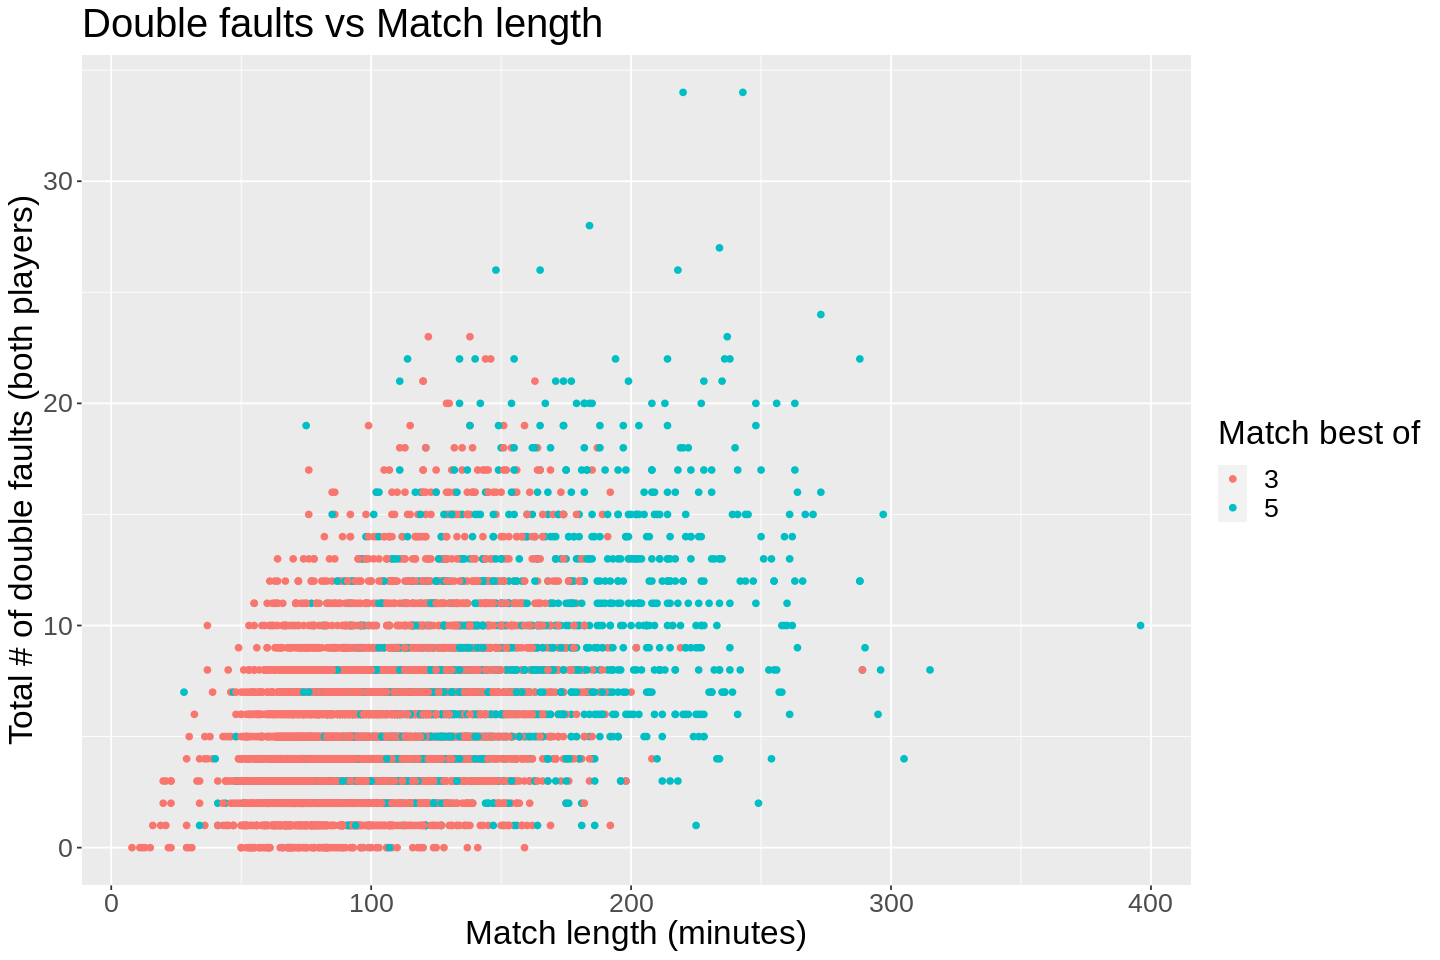

In [27]:
options(repr.plot.width = 12, repr.plot.height = 8) 

df_vs_time_plot <- atp_data_frame %>%
    filter(minutes < 500) %>%
    mutate(total_df = w_df + l_df) %>%
    mutate(best_of = as_factor(best_of)) %>%
    ggplot(aes(x=minutes,y=total_df)) +
        geom_point(aes(color = best_of)) +
        ggtitle("Double faults vs Match length") + 
        labs(x="Match length (minutes)",y="Total # of double faults (both players)", color="Match best of") + 
        theme(text = element_text(size = 20))

df_vs_time_plot

## Preliminary exploratory data analysis  
read  
wrangle  
summarize(into at least one table)   
visualize (at least one plot)  

## Method  
1). explain how we will conduct data analysis  
2). describe how we will visualize result

## Expected outcomes and significance  